## CNV Plotter

### Seltsame GBMs

- gbm_cnv/206600570023_R07C01.bins.igv
- gbm_cnv/204339300095_R06C01.bins.igv

0        0.805269
1       -0.576832
2       -2.821318
3       -2.398692
4       -2.353003
           ...   
15105   -0.108517
15106   -0.062827
15107    0.148486
15108    0.451177
15109    0.582534
Name: value, Length: 15110, dtype: float64
1889


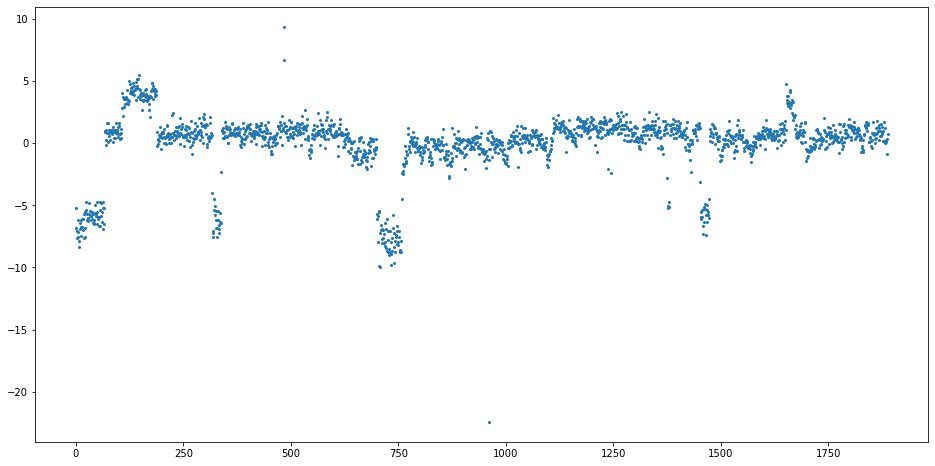

In [78]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.signal import savgol_filter
import pywt
import matplotlib.pyplot as plt

# load a cnv file
df = pd.read_csv("/home/alpha/programs/python_files/datasets/cnv_and_mut/gbm_cnv/206600570023_R07C01.bins.igv", 
                   sep="\t",names=["chr","start","end","feature","value"], header=0)

# df["feature"] = df["feature"].str.contains("Y")
df = df[~df["feature"].str.contains("[YX]")]
x = df["feature"]
y = df["value"]


# normalize then standartize the data
# y = savgol_filter(y, 100, 5)
y_norm = 2*((y-y.min())/(y.max()-y.min()))-1
y_std = (y_norm-y_norm.mean())/y_norm.std()

print(y_std)
# decompose signal
coeffs = pywt.wavedec(y_std, 'db1', level=3)
cX = coeffs[0]
cY = range(len(coeffs[0]))
print(len(coeffs[0]))

plt.figure(figsize=(16,8))
plt.scatter(cY,cX,s=4)
plt.show()

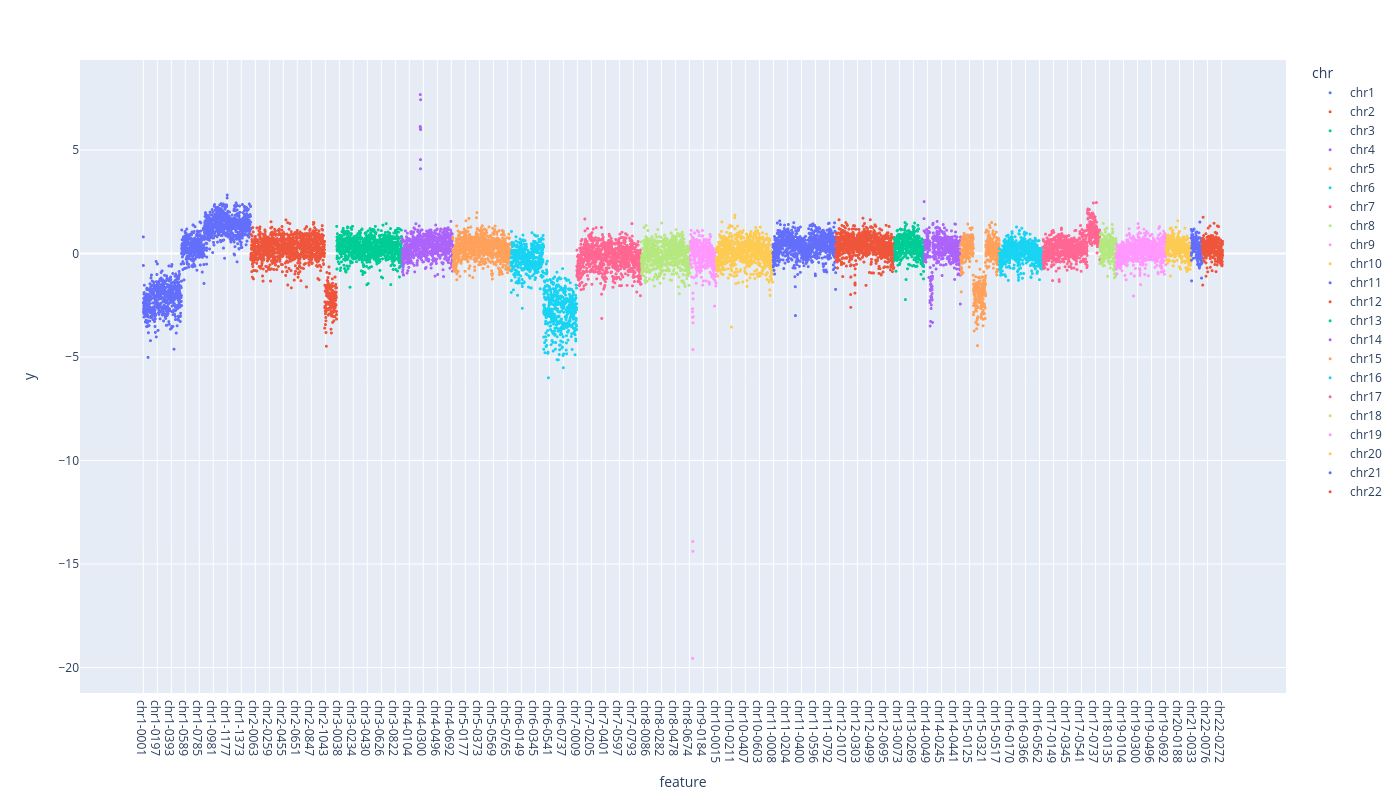

In [79]:
# plot cnv
fig = px.scatter(
    df, x=x, y=y_std, color="chr", color_continuous_scale="rdylgn"
)

fig.update_traces(marker_size=3)
fig.update_layout(width=1500, height=800)

fig.show()